In [13]:
import numpy as np
import pandas as pd
from scipy import spatial, stats, cluster
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
from nilearn import plotting, input_data
from nilearn.datasets import fetch_atlas_schaefer_2018
import networkx as nx
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import bct
import glob
import community as community_louvain
import matplotlib.cm as cm
from sklearn.metrics import adjusted_rand_score
import os
import random


%matplotlib inline

# Styles
sns.set_context('poster')
sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


In [78]:
filename = '../resources/DataSujetos/N1_suj1.csv'
df = pd.read_csv(filename, header=None)
n = df.shape[0]
aristas_posibles = (n*n-1)//2
df -= np.diag(np.ones(n))
filename = '../resources/DataSujetos/W_suj1.csv'
df_w = pd.read_csv(filename, header=None)
df_w -= np.diag(np.ones(n))

In [15]:
def subjectmatrix2graphslist(filename, densities):
    """
    Toma un archivo csv con la matriz de input y devuelve una lista de grafos con la densisdad de aristas correspondiente
    """
    
    correlation_matrix = pd.read_csv(filename, header=None)
    n = correlation_matrix.shape[0]
    correlation_matrix -= np.diag(np.ones(n))
    max_links = (n*n-n)//2
    tril_idx = np.tril_indices(n,-1)
    sorted_correlations = sorted(correlation_matrix.values[tril_idx].flatten(),reverse=True)
    
    Gs = []
    for d in densities:
        idx = int(d*max_links)
        threshold = sorted_correlations[idx]
        Gs.append(nx.from_pandas_adjacency(correlation_matrix>=threshold))
        
    return Gs

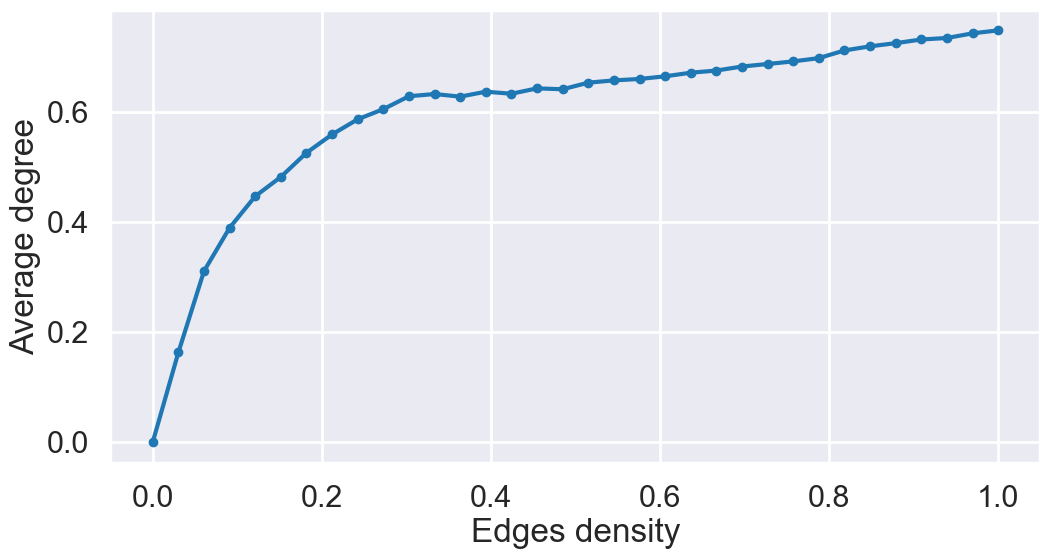

In [16]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
avg_clustering = []
ds = np.arange(0,(n*n-n)//2,200)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    avg_clustering_ = nx.average_clustering(G)
    avg_clustering.append(avg_clustering_)
    
plt.plot(ds/ds.max(),avg_clustering,'.-')
plt.xlabel('Edges density')
plt.ylabel('Average degree');

In [72]:
sort_corrs[300]

0.8923

In [76]:
aristas_posibles= n*n-n
aristas_posibles*0.15

2001.0

### Sujeto 1: N1 vs W

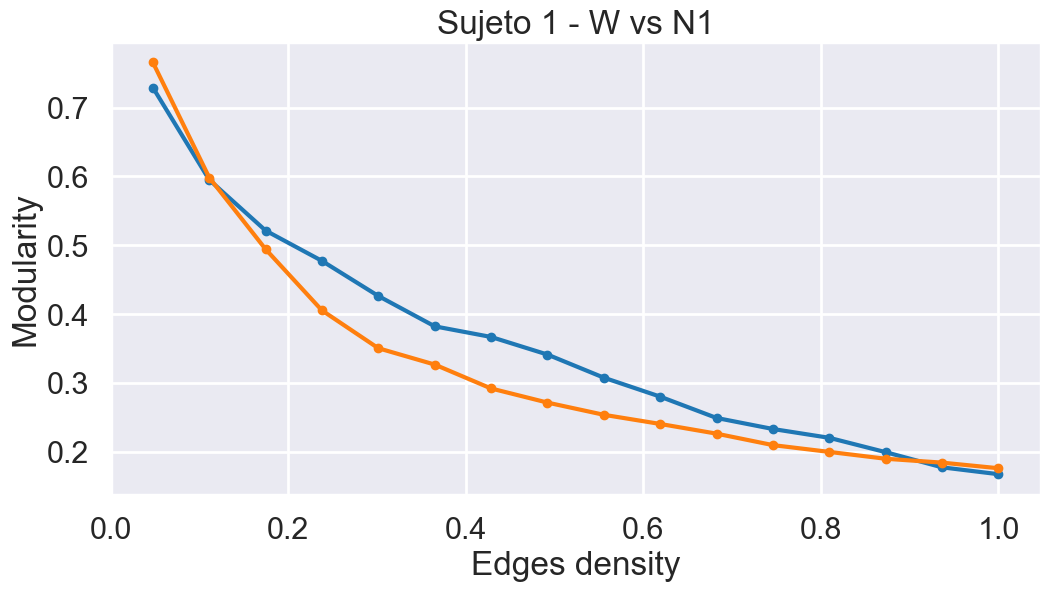

In [71]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []

ds = np.arange(300,(n*n-n)//2,400)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    
plt.plot(ds/ds.max(),modularity,'.-')
plt.plot(ds/ds.max(),modularity_w,'.-')
plt.title('Sujeto 1 - W vs N1')
plt.xlabel('Edges density')
plt.ylabel('Modularity');

### Sujeto 1: N1 vs W, cambio de escala

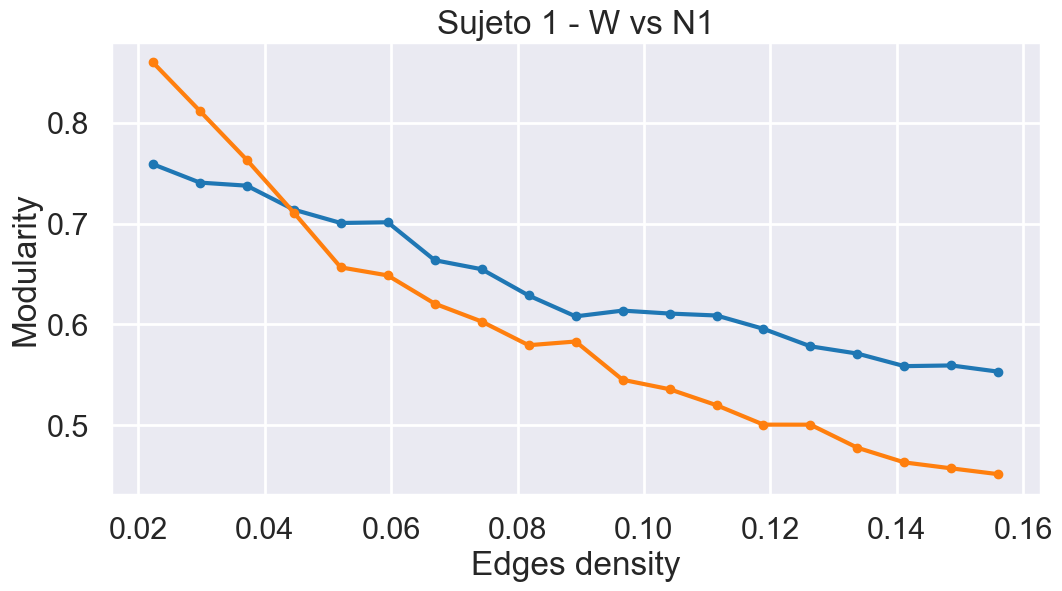

In [82]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []

ds = np.arange(150,2200//2,50)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    
plt.plot(ds/aristas_posibles,modularity,'.-')
plt.plot(ds/aristas_posibles,modularity_w,'.-')
plt.title('Sujeto 1 - W vs N1')
plt.xlabel('Edges density')
plt.ylabel('Modularity');

### Sujeto 2: N1 vs W

In [83]:
filename = '../resources/DataSujetos/N1_suj2.csv'
df = pd.read_csv(filename, header=None)
n = df.shape[0]
df -= np.diag(np.ones(n))
filename = '../resources/DataSujetos/W_suj2.csv'
df_w = pd.read_csv(filename, header=None)
df_w -= np.diag(np.ones(n))

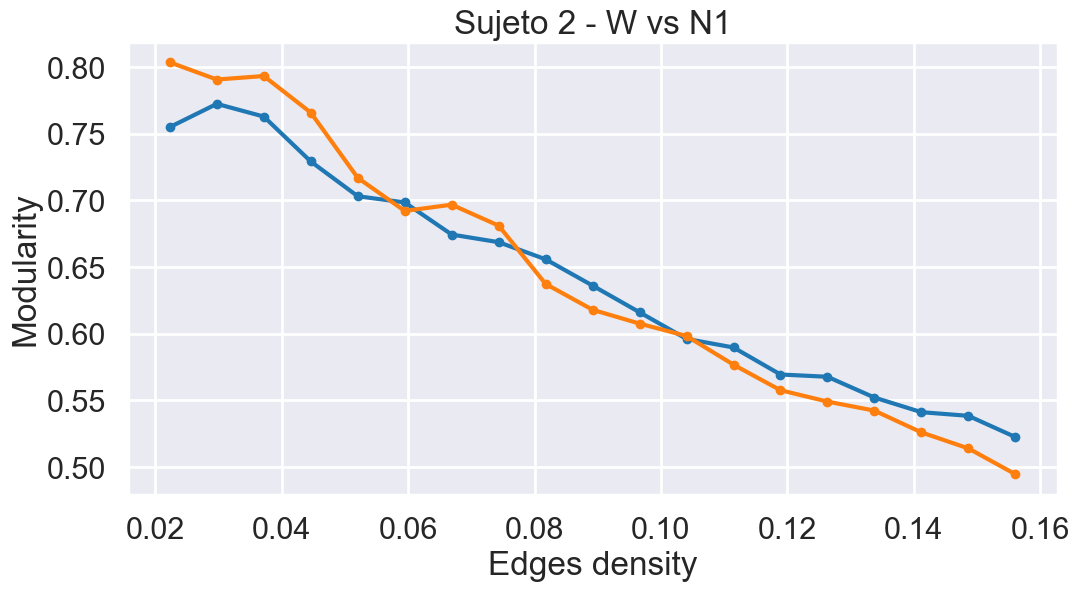

In [84]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []

ds = np.arange(150,2200//2,50)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    
plt.plot(ds/aristas_posibles,modularity,'.-')
plt.plot(ds/aristas_posibles,modularity_w,'.-')
plt.title('Sujeto 2 - W vs N1')
plt.xlabel('Edges density')
plt.ylabel('Modularity');

### Sujeto 2: N3 vs W

In [85]:
filename = '../resources/DataSujetos/N3_suj2.csv'
df = pd.read_csv(filename, header=None)
n = df.shape[0]
df -= np.diag(np.ones(n))
filename = '../resources/DataSujetos/W_suj2.csv'
df_w = pd.read_csv(filename, header=None)
df_w -= np.diag(np.ones(n))

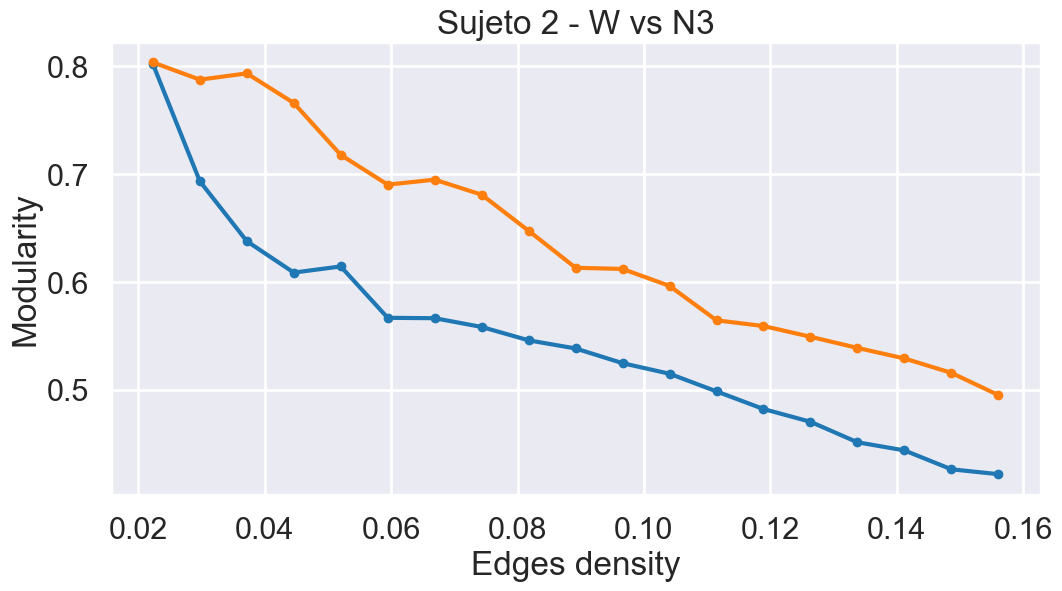

In [86]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []

ds = np.arange(150,2200//2,50)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    
plt.plot(ds/aristas_posibles,modularity,'.-')
plt.plot(ds/aristas_posibles,modularity_w,'.-')
plt.title('Sujeto 2 - W vs N3')
plt.xlabel('Edges density')
plt.ylabel('Modularity');

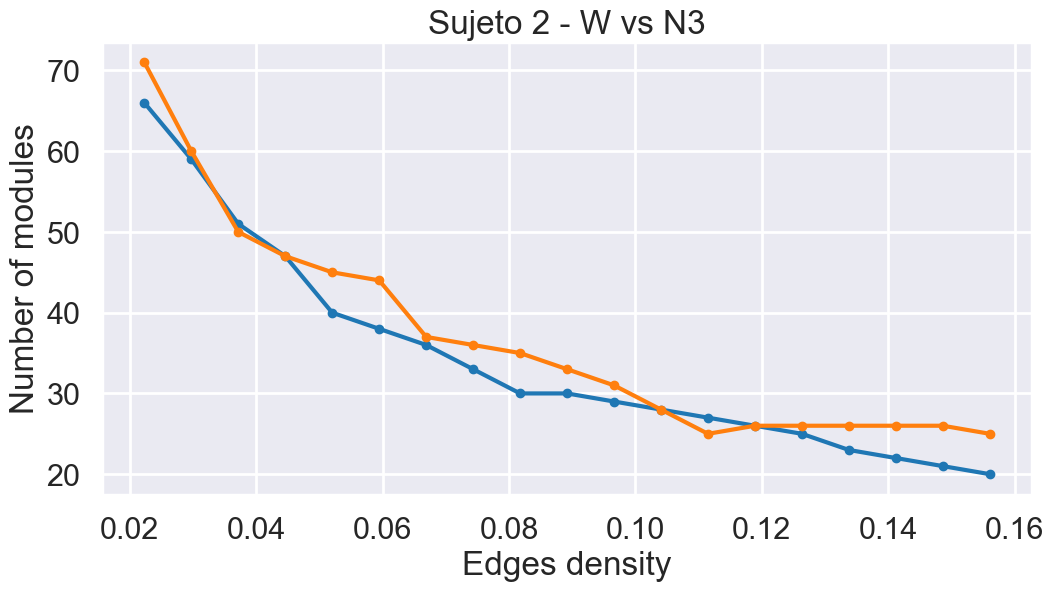

In [117]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []
number_of_modules = []
number_of_modules_w = []

ds = np.arange(150,2200//2,50)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    number_of_modules_ = len(set(list(modulos.values())))
    number_of_modules.append(number_of_modules_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    number_of_modules_ = len(set(list(modulos.values())))
    number_of_modules_w.append(number_of_modules_)
    
subplot(211)   
plt.plot(ds/aristas_posibles,number_of_modules,'.-')
plt.plot(ds/aristas_posibles,number_of_modules_w,'.-')
plt.title('Sujeto 2 - W vs N3')
plt.xlabel('Edges density')
plt.ylabel('Modularity')

subplot(212)
plt.plot(ds/aristas_posibles,number_of_modules,'.-')
plt.plot(ds/aristas_posibles,number_of_modules_w,'.-')
plt.title('Sujeto 2 - W vs N3')
plt.xlabel('Edges density')
plt.ylabel('Number of modules')


Text(0, 0.5, 'Number of modules')

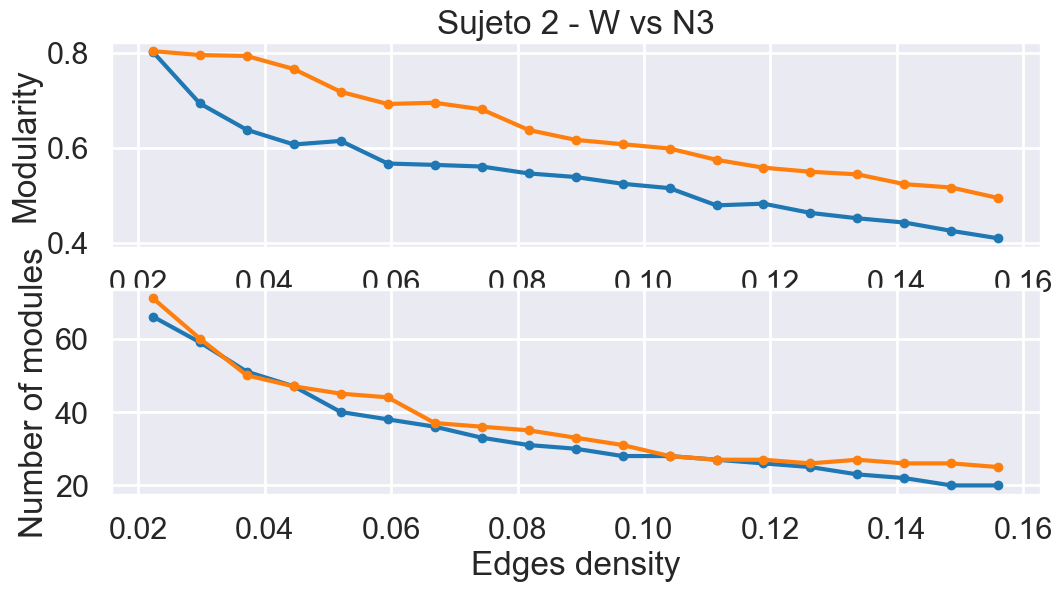

In [123]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []
number_of_modules = []
number_of_modules_w = []

ds = np.arange(150,2200//2,50)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    number_of_modules_ = len(set(list(modulos.values())))
    number_of_modules.append(number_of_modules_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    number_of_modules_ = len(set(list(modulos.values())))
    number_of_modules_w.append(number_of_modules_)
    
plt.subplot(211)   
plt.plot(ds/aristas_posibles,modularity,'.-')
plt.plot(ds/aristas_posibles,modularity_w,'.-')
plt.title('Sujeto 2 - W vs N3')
plt.ylabel('Modularity')

plt.subplot(212)
plt.plot(ds/aristas_posibles,number_of_modules,'.-')
plt.plot(ds/aristas_posibles,number_of_modules_w,'.-')
plt.xlabel('Edges density')
plt.ylabel('Number of modules')


### Cálculo de coeficiente de modularidad y Número de módulos para cada sujeto, en función a distintas densidades

### Se definen las densidades de links a emplear

In [ ]:
ds = np.arange(150,2200//2,50)

### Estadío W

In [221]:
for i in range(18):
    filename = '../resources/DataSujetos/W_suj' + str(i+1) + '.csv'
    df = pd.read_csv(filename, header=None)
    df -= np.diag(np.ones(n))
    ds = np.arange(150,2200//2,50)
    
    sort_corrs = sorted(df.values.flatten(),reverse=True)
    modularity = []
    number_of_modules = []
    
    for d in ds:
        u = sort_corrs[d]
        G = nx.from_pandas_adjacency(df>=u)
        modulos = community_louvain.best_partition(G)
        modularity_ = community_louvain.modularity(modulos,G)
        modularity.append(modularity_)
        number_of_modules_ = len(set(list(modulos.values())))
        number_of_modules.append(number_of_modules_)
    
    if i == 0:
        df_modularity_W = pd.DataFrame(modularity)
        df_number_of_modules_W = pd.DataFrame(number_of_modules)
    
    df_modularity_W.loc[:,i] = pd.DataFrame(modularity)
    df_number_of_modules_W.loc[:,i] = number_of_modules
    
    df_modularity_W['mean']=df_modularity_W.mean(axis=1)
    df_number_of_modules_W['mean']=df_number_of_modules_W.mean(axis=1)


### Estadío N1

In [241]:
for i in range(18):
    filename = '../resources/DataSujetos/N1_suj' + str(i+1) + '.csv'
    df = pd.read_csv(filename, header=None)
    df -= np.diag(np.ones(n))

    
    sort_corrs = sorted(df.values.flatten(),reverse=True)
    modularity = []
    number_of_modules = []
    
    for d in ds:
        u = sort_corrs[d]
        G = nx.from_pandas_adjacency(df>=u)
        modulos = community_louvain.best_partition(G)
        modularity_ = community_louvain.modularity(modulos,G)
        modularity.append(modularity_)
        number_of_modules_ = len(set(list(modulos.values())))
        number_of_modules.append(number_of_modules_)
    
    if i == 0:
        df_modularity_N1 = pd.DataFrame(modularity)
        df_number_of_modules_N1 = pd.DataFrame(number_of_modules)
    
    df_modularity_N1.loc[:,i] = pd.DataFrame(modularity)
    df_number_of_modules_N1.loc[:,i] = number_of_modules
    
    df_modularity_N1['mean']=df_modularity_N1.mean(axis=1)
    df_number_of_modules_N1['mean']=df_number_of_modules_N1.mean(axis=1)

  

Text(0, 0.5, 'Number of modules')

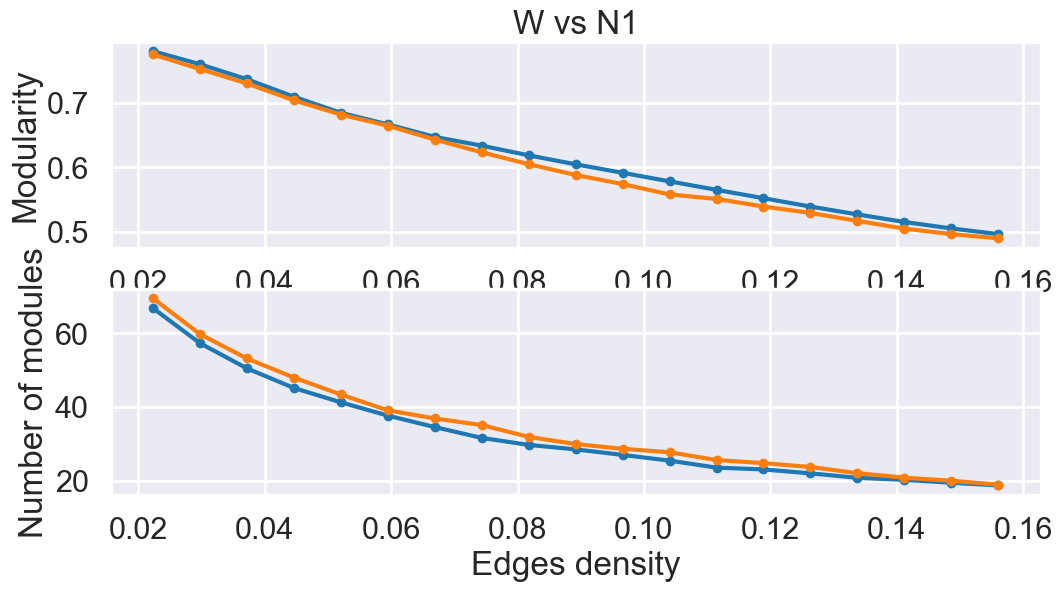

In [244]:
plt.subplot(211)   
plt.plot(ds/aristas_posibles,list(df_modularity_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_modularity_N1['mean']),'.-')
plt.title('W vs N1')
plt.ylabel('Modularity')

plt.subplot(212)
plt.plot(ds/aristas_posibles,list(df_number_of_modules_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_number_of_modules_N1['mean']),'.-')
plt.xlabel('Edges density')
plt.ylabel('Number of modules')


### Estadío N2

In [246]:
for i in range(18):
    filename = '../resources/DataSujetos/N2_suj' + str(i+1) + '.csv'
    df = pd.read_csv(filename, header=None)
    df -= np.diag(np.ones(n))

    
    sort_corrs = sorted(df.values.flatten(),reverse=True)
    modularity = []
    number_of_modules = []
    
    for d in ds:
        u = sort_corrs[d]
        G = nx.from_pandas_adjacency(df>=u)
        modulos = community_louvain.best_partition(G)
        modularity_ = community_louvain.modularity(modulos,G)
        modularity.append(modularity_)
        number_of_modules_ = len(set(list(modulos.values())))
        number_of_modules.append(number_of_modules_)
    
    if i == 0:
        df_modularity_N2 = pd.DataFrame(modularity)
        df_number_of_modules_N2 = pd.DataFrame(number_of_modules)
    
    df_modularity_N2.loc[:,i] = pd.DataFrame(modularity)
    df_number_of_modules_N2.loc[:,i] = number_of_modules
    
    df_modularity_N2['mean']=df_modularity_N2.mean(axis=1)
    df_number_of_modules_N2['mean']=df_number_of_modules_N2.mean(axis=1)

  

Text(0, 0.5, 'Number of modules')

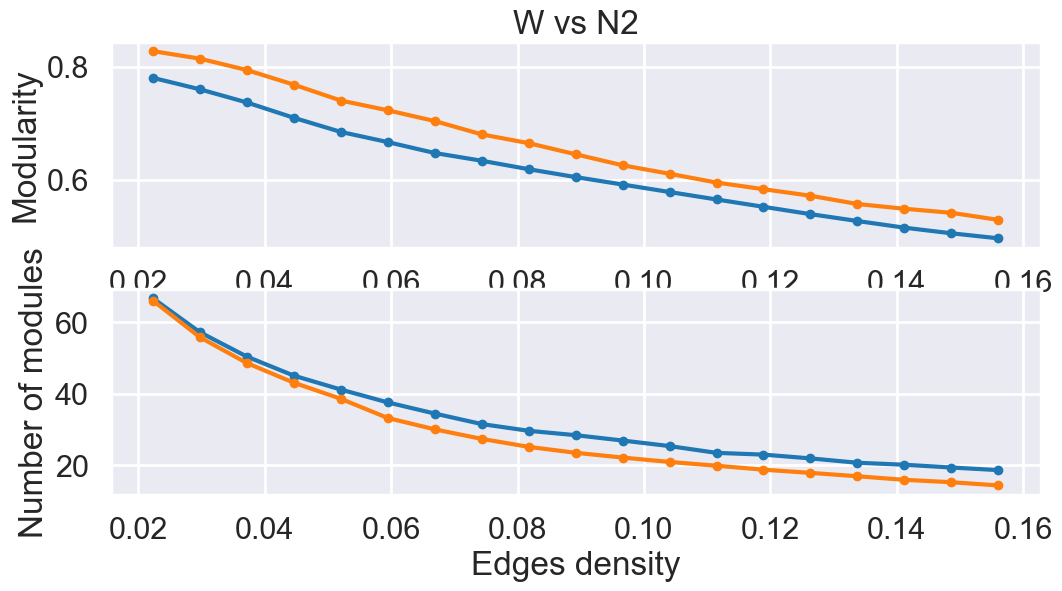

In [247]:
plt.subplot(211)   
plt.plot(ds/aristas_posibles,list(df_modularity_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_modularity_N2['mean']),'.-')
plt.title('W vs N2')
plt.ylabel('Modularity')

plt.subplot(212)
plt.plot(ds/aristas_posibles,list(df_number_of_modules_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_number_of_modules_N2['mean']),'.-')
plt.xlabel('Edges density')
plt.ylabel('Number of modules')


### Estadío N3

In [228]:
for i in range(18):
    filename = '../resources/DataSujetos/N3_suj' + str(i+1) + '.csv'
    df = pd.read_csv(filename, header=None)
    df -= np.diag(np.ones(n))

    
    sort_corrs = sorted(df.values.flatten(),reverse=True)
    modularity = []
    number_of_modules = []
    
    for d in ds:
        u = sort_corrs[d]
        G = nx.from_pandas_adjacency(df>=u)
        modulos = community_louvain.best_partition(G)
        modularity_ = community_louvain.modularity(modulos,G)
        modularity.append(modularity_)
        number_of_modules_ = len(set(list(modulos.values())))
        number_of_modules.append(number_of_modules_)
    
    if i == 0:
        df_modularity_N3 = pd.DataFrame(modularity)
        df_number_of_modules_N3 = pd.DataFrame(number_of_modules)
    
    df_modularity_N3.loc[:,i] = pd.DataFrame(modularity)
    df_number_of_modules_N3.loc[:,i] = number_of_modules
    
    df_modularity_N3['mean']=df_modularity_N3.mean(axis=1)
    df_number_of_modules_N3['mean']=df_number_of_modules_N3.mean(axis=1)

  

Text(0, 0.5, 'Number of modules')

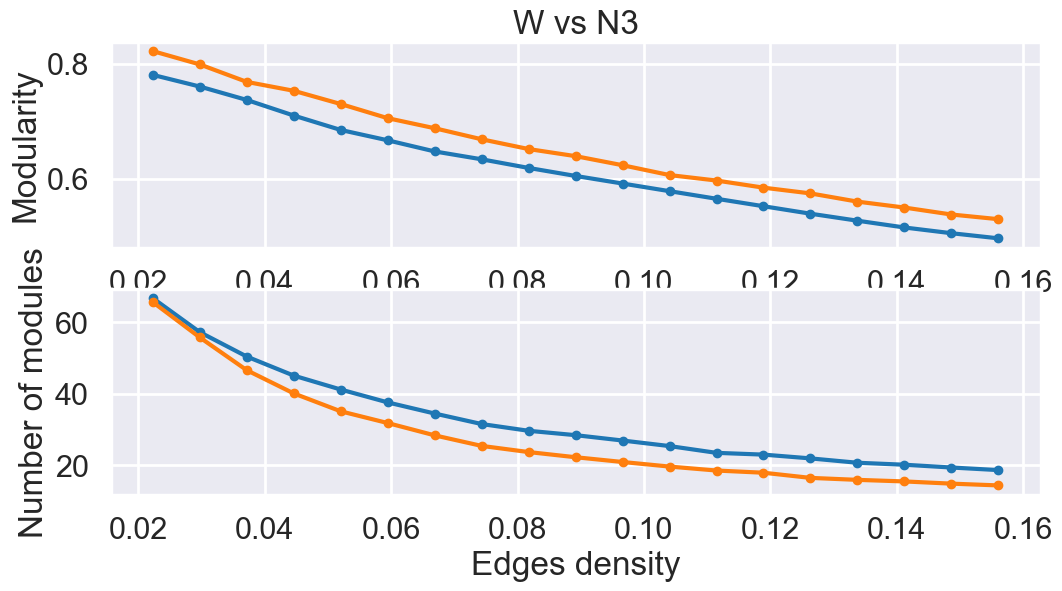

In [230]:
plt.subplot(211)   
plt.plot(ds/aristas_posibles,list(df_modularity_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_modularity_N3['mean']),'.-')
plt.title('W vs N3')
plt.ylabel('Modularity')

plt.subplot(212)
plt.plot(ds/aristas_posibles,list(df_number_of_modules_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_number_of_modules_N3['mean']),'.-')
plt.xlabel('Edges density')
plt.ylabel('Number of modules')
